In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Leer la base de datos `edades.csv`

In [2]:
df = pd.read_csv('edades.csv')

* Discretizar los datos en 10 intervalos iguales. ¿Cuántas personas forman parte de cada intervalo? ¿Cuál es este intervalo?

In [ ]:
df['bin_equal'] = pd.cut(df['edades'], bins=10, include_lowest=True)

In [5]:
counts_equal = df['bin_equal'].value_counts().sort_index()
counts_equal

bin_equal
(-0.10200000000000001, 10.1]    44
(10.1, 20.2]                    99
(20.2, 30.3]                    53
(30.3, 40.4]                    14
(40.4, 50.5]                    10
(50.5, 60.6]                     8
(60.6, 70.7]                     3
(70.7, 80.8]                     1
(80.8, 90.9]                     2
(90.9, 101.0]                    2
Name: count, dtype: int64

In [6]:
min_age = df['edades'].min()
max_age = df['edades'].max()
interval_width = (max_age - min_age) / 10
print(f"\nCada intervalo mide: {interval_width:.2f} unidades de edad")
print("Los bordes exactos de los intervalos son:")
counts_equal.index


Cada intervalo mide: 10.10 unidades de edad
Los bordes exactos de los intervalos son:


CategoricalIndex([(-0.10200000000000001, 10.1],                 (10.1, 20.2],
                                  (20.2, 30.3],                 (30.3, 40.4],
                                  (40.4, 50.5],                 (50.5, 60.6],
                                  (60.6, 70.7],                 (70.7, 80.8],
                                  (80.8, 90.9],                (90.9, 101.0]],
                 categories=[(-0.10200000000000001, 10.1], (10.1, 20.2], (20.2, 30.3], (30.3, 40.4], ..., (60.6, 70.7], (70.7, 80.8], (80.8, 90.9], (90.9, 101.0]], ordered=True, dtype='category', name='bin_equal')

* Discretizar los datos en edades de 10 en 10. ¿Cuántas personas forman parte de cada intervalo?

In [10]:
start = (min_age // 10) * 10
end   = ((max_age // 10) + 1) * 10
bins_10 = np.arange(start, end + 1, 10)

df['bin_10yrs'] = pd.cut(df['edades'], bins=bins_10, right=False, include_lowest=True)
counts_10yrs = df['bin_10yrs'].value_counts().sort_index()
print("\nConteo por intervalos de 10 años:")
counts_10yrs


Conteo por intervalos de 10 años:


bin_10yrs
[0, 10)       39
[10, 20)      97
[20, 30)      58
[30, 40)      16
[40, 50)      10
[50, 60)       8
[60, 70)       3
[70, 80)       1
[80, 90)       2
[90, 100)      1
[100, 110)     1
Name: count, dtype: int64

* Discretizar los datos y nombrar los intervalos de acuerdo a la siguiente tabla:

Nombre del rango|Rango
------------------|:--------:
bebé|0-2
niño|3-11
adolecente|12-17
joven|18-25
adulto joven|26-39
adulto maduro|40-59
adulto mayor |60 en adelante

Para nombrar los intervalos use el argumento `labels` de la función `cut`

In [15]:
bins = [0, 2, 11, 17, 25, 39, 59, df['edades'].max()]
labels = [
    'bebé',
    'niño',
    'adolescente',
    'joven',
    'adulto joven',
    'adulto maduro',
    'adulto mayor'
]

df['grupo_edad'] = pd.cut(
    df['edades'],
    bins=bins,
    labels=labels,
    include_lowest=True,  # para que el 0 quede incluido en 'bebé'
    right=True           # intervalo tipo (a, b], (2,11] -> 3–11
)


* Mostrar un histograma de esta última discretización (¿Cuántas personas forman parte de cada grupo?).

In [13]:
counts = df['grupo_edad'].value_counts().reindex(labels)
counts

grupo_edad
bebé             16
niño             28
adolescente      66
joven            71
adulto joven     29
adulto maduro    18
adulto mayor      8
Name: count, dtype: int64

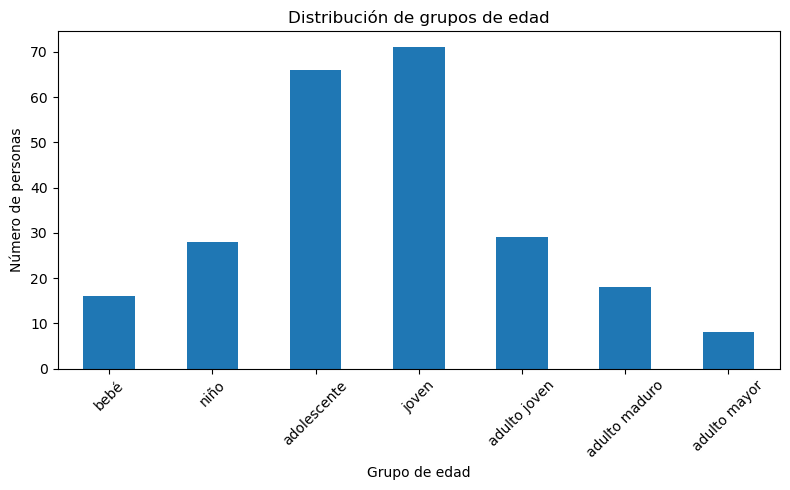

In [14]:
plt.figure(figsize=(8,5))
counts.plot(kind='bar')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de personas')
plt.title('Distribución de grupos de edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()